In [1]:
import sympy as sym
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


#ÍTEM 1

Punto 1

In [2]:
Loss_dt, g, W, G, C_rr, AC_d, rho, V_gs, V_hw = sym.symbols("Loss_dt, g, W, G, C_rr, AC_d, rho, V_gs, V_hw")

In [3]:
P_legs = (1-Loss_dt/100)**(-1)*( g*W*sym.sin(sym.atan(G/100))+g*W*sym.cos(sym.atan(G/100))*C_rr + 0.5*AC_d*rho*(V_gs+V_hw)**2)*V_gs
P_legs

V_gs*(0.5*AC_d*rho*(V_gs + V_hw)**2 + C_rr*W*g/sqrt(G**2/10000 + 1) + G*W*g/(100*sqrt(G**2/10000 + 1)))/(1 - Loss_dt/100)

In [4]:
poly_form_almost = P_legs.expand(V_gs)
poly_form_almost

0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + 0.5*AC_d*V_gs*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*V_gs*W*g/(-Loss_dt*sqrt(G**2/10000 + 1)/100 + sqrt(G**2/10000 + 1)) + G*V_gs*W*g/(-Loss_dt*sqrt(G**2/10000 + 1) + 100*sqrt(G**2/10000 + 1))

In [5]:
poly_form = 0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + (0.5*AC_d*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*W*g/(-Loss_dt*sym.sqrt(G**2/10000 + 1)/100 + sym.sqrt(G**2/10000 + 1)) + G*W*g/(-Loss_dt*sym.sqrt(G**2/10000 + 1) + 100*sym.sqrt(G**2/10000 + 1)))*V_gs
poly_form

0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + V_gs*(0.5*AC_d*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*W*g/(-Loss_dt*sqrt(G**2/10000 + 1)/100 + sqrt(G**2/10000 + 1)) + G*W*g/(-Loss_dt*sqrt(G**2/10000 + 1) + 100*sqrt(G**2/10000 + 1)))

Punto 2

In [8]:
Pleggs = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],[rho,1.225],[W,83.5],[g,9.77]])
Pleggs

0.21875*V_gs**3 + V_gs*(8.3244387755102*G/sqrt(G**2/10000 + 1) + 4.1622193877551/sqrt(G**2/10000 + 1))

In [7]:
puertos = pd.read_excel("data\puertos.xlsx")
primera_grafica = puertos.loc[puertos["Primera gráfica\nÚltimo dígito 1er estudiante"]==1].reset_index()
segunda_grafica = puertos.loc[puertos["Segunda gráfica\nÚltimo dígito 2do estudiante"]==9].reset_index()

In [77]:
x,t =sym.symbols("x,t")

pendiente_1 = primera_grafica["Pendiente promedio [%]"][0]
distancia_1 = primera_grafica["Distancia [km]"][0] * 1000
tiempo_1 = primera_grafica["Mejor tiempo registrado en Strava [min]"][0]* 60

pendiente_2 = segunda_grafica["Pendiente promedio [%]"][0]
distancia_2 = segunda_grafica["Distancia [km]"][0] * 1000
tiempo_2 = segunda_grafica["Mejor tiempo registrado en Strava [min]"][0] * 60


Pleggs1 = Pleggs.subs([[G,pendiente_1],[V_gs,x/t]])
Pleggs1 = Pleggs1.subs(x,distancia_1)

Pleggs2 = Pleggs.subs([[G,pendiente_2],[V_gs,x/t]])
Pleggs2 = Pleggs2.subs(x,distancia_2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


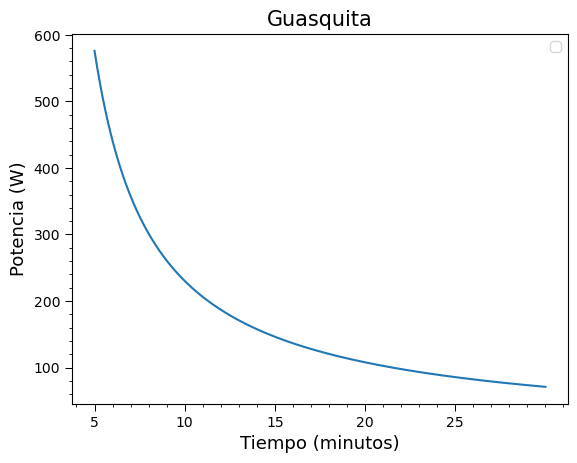

In [78]:
tiempos1 = np.linspace(300,1800,1000)
tiempos2 = np.linspace(840,5040,1000)

P_leggs1 = sym.lambdify(t,Pleggs1)
P_leggs2 = sym.lambdify(t,Pleggs2)


plt.plot(tiempos1 / 60,P_leggs1(tiempos1))
plt.title(primera_grafica["Nombre del puerto"][0], fontsize=15)
plt.ylabel("Potencia (W)", fontsize=13)
plt.xlabel("Tiempo (minutos)", fontsize=13)
plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.minorticks_on()
plt.xticks(np.arange(5,30,5))
plt.legend()

([<matplotlib.axis.XTick at 0x2a7ae006c80>,
 [Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80')])

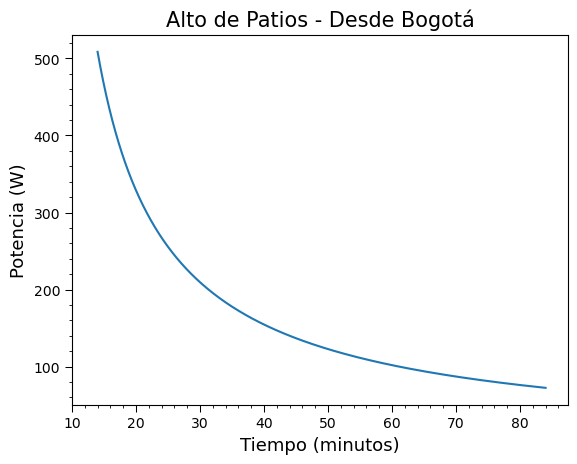

In [79]:
plt.plot(tiempos2 / 60,P_leggs2(tiempos2))
plt.ylabel("Potencia (W)", fontsize=13)
plt.xlabel("Tiempo (minutos)", fontsize=13)
plt.title(segunda_grafica["Nombre del puerto"][0], fontsize=15)
plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.minorticks_on()
plt.xticks(np.arange(10,90,10))

Punto 3

In [80]:
tiempo_237W_primera_grafica = sym.solve(sym.Eq(Pleggs1,237),t)[0]
tiempo_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs2,237),t)[0]

In [87]:
round(tiempo_237W_primera_grafica / 60 , 1), round(tiempo_237W_segunda_grafica / 60 , 1) 

(9.8, 26.8)

Punto 4

In [88]:
Pleggs_new1_primera_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,82.5],[g,9.77],[V_gs,x/t],[G,pendiente_1]])
Pleggs_new1_primera_grafica = Pleggs_new1_primera_grafica.subs(x,distancia_1)


Pleggs_new2_primera_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,78.5],[g,9.77],[V_gs,x/t],[G,pendiente_1]])
Pleggs_new2_primera_grafica = Pleggs_new2_primera_grafica.subs(x,distancia_1)

In [89]:
tiempo1_237W_primera_grafica = sym.solve(sym.Eq(Pleggs_new1_primera_grafica,237),t)[0]
tiempo2_237W_primera_grafica = sym.solve(sym.Eq(Pleggs_new2_primera_grafica,237),t)[0]

tiempo_ganado1_primera_grafica = tiempo_237W_primera_grafica - tiempo1_237W_primera_grafica
tiempo_ganado2_primera_grafica = tiempo_237W_primera_grafica - tiempo2_237W_primera_grafica

tiempo_ganado1_primera_grafica, tiempo_ganado2_primera_grafica

(5.42788426299228, 26.9016607567862)

In [90]:
Pleggs_new1_segunda_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,82.5],[g,9.77],[V_gs,x/t],[G,pendiente_2]])
Pleggs_new1_segunda_grafica = Pleggs_new1_segunda_grafica.subs(x,distancia_2)


Pleggs_new2_segunda_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,78.5],[g,9.77],[V_gs,x/t],[G,pendiente_2]])
Pleggs_new2_segunda_grafica = Pleggs_new2_segunda_grafica.subs(x,distancia_2)

In [91]:
tiempo1_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs_new1_segunda_grafica,237),t)[0]
tiempo2_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs_new2_segunda_grafica,237),t)[0]

tiempo_ganado1_segunda_grafica = tiempo_237W_segunda_grafica - tiempo1_237W_segunda_grafica
tiempo_ganado2_segunda_grafica = tiempo_237W_segunda_grafica - tiempo2_237W_segunda_grafica

tiempo_ganado1_segunda_grafica, tiempo_ganado2_segunda_grafica

(16.7852969719399, 83.4507131552232)

Punto 5

Aqui el problema estaba en que al comienzo no tomamos el mejor tiempo sino que empezamos la grafica desde  t = 0, cuando la grafica no iniciaba desde ahi. El otro incoveniente fue con las unidades, que no se tomaron en cuenta. Ya despues se paso todo a sistema internacional, y en la grafica convertimos de nuevo a minutos para que su entendimiento fuera mejor.

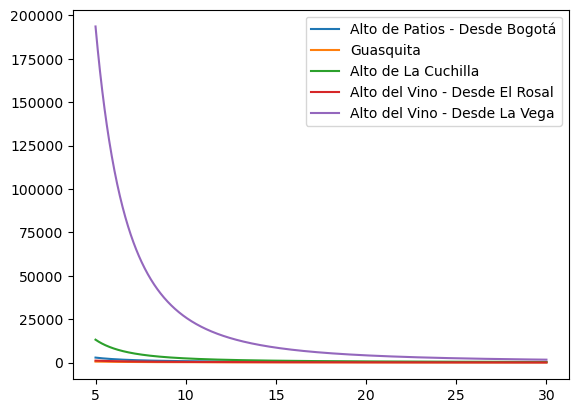

In [94]:
for i in range(5):
    conjunto = puertos.loc[puertos["Primera gráfica\nÚltimo dígito 1er estudiante"]==i].reset_index()

    pendiente = conjunto["Pendiente promedio [%]"][0]
    distancia = conjunto["Distancia [km]"][0] * 1000
    tiempo = conjunto["Mejor tiempo registrado en Strava [min]"][0]*60

    Pleggs_ = Pleggs.subs([[G,pendiente],[V_gs,x/t]])
    Pleggs_ = Pleggs_.subs(x,distancia)

    func_save = sym.lambdify(t,Pleggs_)

    plt.plot(tiempos1 / 60,func_save(tiempos1),label="{0}".format(conjunto["Nombre del puerto"][0]))

plt.legend()
    

#ÍTEM 2

In [140]:
DataFrame2 = pd.read_excel("data/data.xlsx")

Punto 1

In [143]:
Cadence_cut = DataFrame2[(DataFrame2[" cadence [rpm]"]<90)&(DataFrame2[" cadence [rpm]"]>70)]
heartrate_mean = Cadence_cut[" heartrate [bpm]"].mean()
heartrate_mean

177.59649122807016

Punto 2

In [159]:
zona1_filas = DataFrame2[(DataFrame2[" watts [W]"]<=130)&(DataFrame2[" watts [W]"]>=0)].shape[0]
zona1_porcentaje = 100 * zona1_filas/DataFrame2.shape[0]

zona2_filas = DataFrame2[(DataFrame2[" watts [W]"]<=178)&(DataFrame2[" watts [W]"]>130)].shape[0]
zona2_porcentaje = 100 * zona2_filas/DataFrame2.shape[0]

zona3_filas = DataFrame2[(DataFrame2[" watts [W]"]<=213)&(DataFrame2[" watts [W]"]>178)].shape[0]
zona3_porcentaje = 100 * zona3_filas/DataFrame2.shape[0]

zona4_filas = DataFrame2[(DataFrame2[" watts [W]"]<=249)&(DataFrame2[" watts [W]"]>213)].shape[0]
zona4_porcentaje = 100 * zona4_filas/DataFrame2.shape[0]

zona5_filas = DataFrame2[(DataFrame2[" watts [W]"]<=284)&(DataFrame2[" watts [W]"]>249)].shape[0]
zona5_porcentaje = 100 * zona5_filas/DataFrame2.shape[0]

zona6_filas = DataFrame2[(DataFrame2[" watts [W]"]<=356)&(DataFrame2[" watts [W]"]>284)].shape[0]
zona6_porcentaje = 100 * zona6_filas/DataFrame2.shape[0]

zona7_filas = DataFrame2[(DataFrame2[" watts [W]"]<=1500)&(DataFrame2[" watts [W]"]>356)].shape[0]
zona7_porcentaje = 100 * zona7_filas/DataFrame2.shape[0]

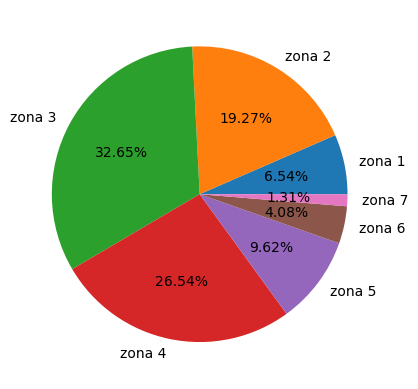

In [223]:
porcentajes = np.array([zona1_porcentaje, zona2_porcentaje, zona3_porcentaje, 
                        zona4_porcentaje, zona5_porcentaje, zona6_porcentaje, 
                        zona7_porcentaje])

labels = "zona 1", "zona 2", "zona 3", "zona 4", "zona 5", "zona 6", "zona 7"

plt.pie(porcentajes,autopct='%1.2f%%',labels=labels)
plt.show()

(1.0, 100.0)

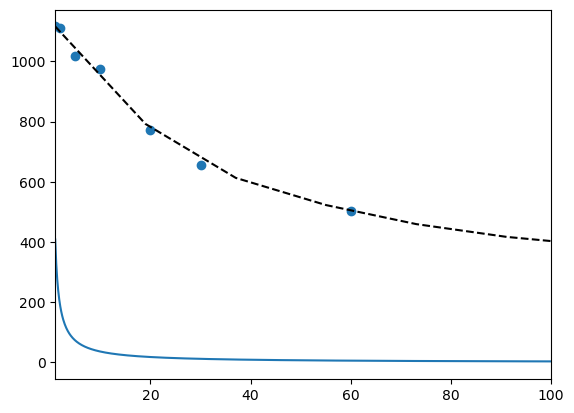

In [244]:
p_media = np.array(DataFrame3["Power [W]"])
time = np.array(DataFrame3["Time [s]"])

itp_spline = scipy.interpolate.splrep(time, p_media, k=3)

x_new = np.linspace(time[0],time[-1],1000)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)

plt.scatter(time,p_media)
plt.plot(x_new,y_new,color="black",linestyle="--")

tiempos = np.linspace(1,10000,100000)
plt.plot(tiempos,P_leggs2(tiempos),label="{0}".format(primera_grafica["Nombre del puerto"][0]))

plt.xlim(1,100)

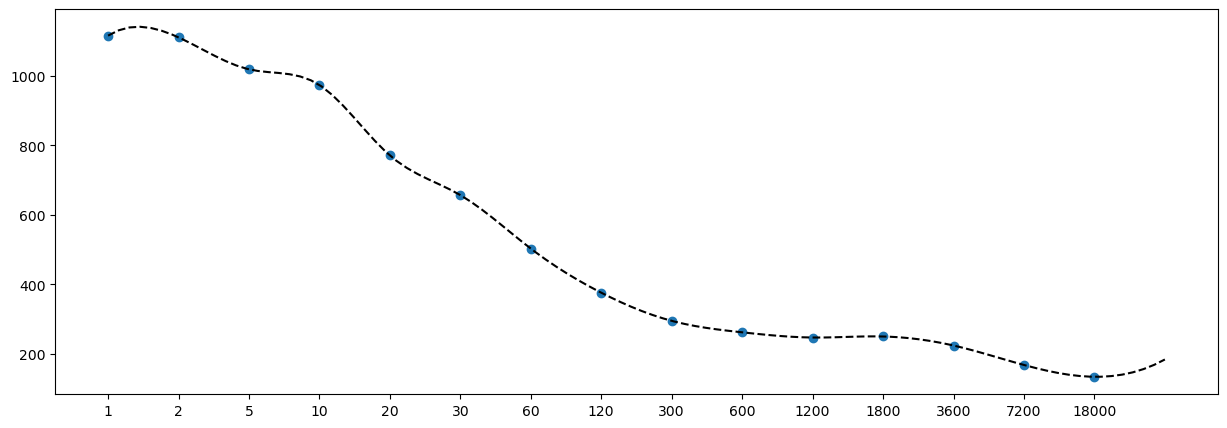

In [227]:
figure, ax = plt.subplots(figsize=(15,5))
DataFrame3 = pd.read_csv("data/curva-potencia.csv",sep=";")

p_media = np.array(DataFrame3["Power [W]"])
time = np.array(DataFrame3["Time [s]"])

itp_spline = scipy.interpolate.splrep(range(len(p_media)), p_media, k=3)

x_new = np.linspace(0,len(p_media),100)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)

plt.scatter(range(len(p_media)),p_media)
plt.plot(x_new,y_new,color="black",linestyle="--")

plt.xticks(range(len(p_media)),time)

plt.show()